## Exploratory Data Analysis 
Telecom Data Analysis

In [51]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery-nogrid')

In [13]:
df = pd.read_excel("./Telecom Churn Rate Dataset.xlsx")

In [14]:
df.shape

(7043, 23)

In [15]:
columns = df.columns

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


### Features Description

customerID: the customer id

gender: the customer gender

SeniorCitizen: the customer is a senior (1) or not (0)

Partner: the customer has a partner or not

Dependents: the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: the customer has a phone service or not

MultipleLines: the customer has multiple lines or not

InternetService: the customer’s internet service provider

OnlineSecurity: the customer has online security or not (Yes, No, No internet service)

OnlineBackup: the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: the customer has device protectiony or not (Yes, No, No internet service)

TechSupport: the customer has tech support or not

StreamingTV: the customer has streaming TV or not

StreamingMovies: the customer has streaming Movies or not

Contract: the customer contract term

PaperlessBilling: the customer has paperless billing or not

PaymentMethod: the customer payment method (bank, mailed check, electronic)

MonthlyCharges: the amount charged to the customer

TotalCharges: the total charged to the customer

numAdminTickets: the number of administrative tickets

numTechTickets: the number of technical support tickets

Churn: the customer churned or not

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

No Missing Values

In [159]:
# converting TotalCharges column to float
index_space = df[df['TotalCharges']==' '].index
df = df.drop(index_space)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [160]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [161]:
print(f"the dataset contains {len(categorical_cols)} categorical variables")

the dataset contains 17 categorical variables


In [162]:
numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

In [163]:
print(f"the dataset contains {len(numerical_cols)} numerical variables")

the dataset contains 6 numerical variables


In [164]:
duplicate_rows = df[df.duplicated()]

In [165]:
print("the dataset contains no duplicates")

the dataset contains no duplicates


## Univariate Analysis

### tenure

In [166]:
df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

<Axes: xlabel='tenure', ylabel='Count'>

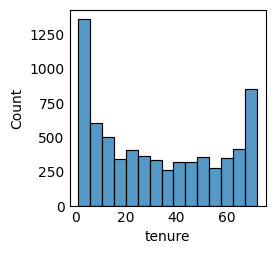

In [167]:
sns.histplot( data = df, x= df["tenure"])

observation: 
the two biggest values are 1 and 72 which means that customers leave in the first month or stay more than 6 years


hypothesis:
- the customers leave because of the bad service
- the customers that stay longer because of the contract term or the payment facilities


### Contract term

In [168]:
df["Contract"].value_counts(dropna=False)

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [169]:
(df["Contract"].value_counts(dropna=False) / len(df)) * 100

Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: count, dtype: float64

observation:
- there are three contract types offered: Month-to-month, Two year, One year
- the majority of customers (55%) have opted for month-to-month contract

### MonthlyCharges

In [170]:
df["MonthlyCharges"].isna().sum()

0

In [171]:
df["MonthlyCharges"].value_counts(dropna=False)

MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1584, dtype: int64

In [172]:
df["MonthlyCharges"].value_counts(dropna=False).head(n=10)

MonthlyCharges
20.05    61
19.90    44
19.95    44
19.85    44
19.65    43
20.00    42
19.70    42
20.15    40
19.55    40
19.75    39
Name: count, dtype: int64

In [173]:
df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<Figure size 1000x600 with 0 Axes>

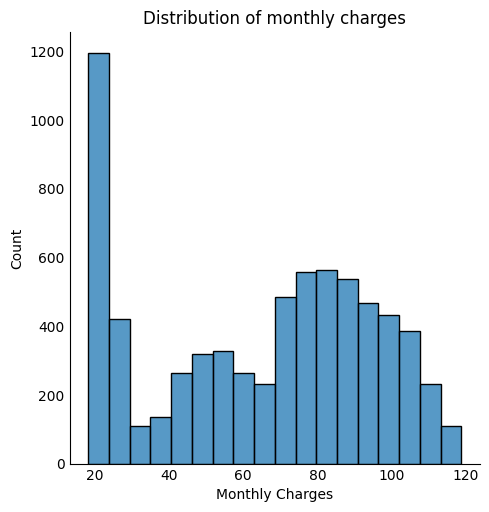

In [174]:
plt.figure(figsize=(10,6))
sns.displot(df['MonthlyCharges'])
plt.title('Distribution of monthly charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

- the most common monthly charges are around 19 to 20 dollars
- Most consumers consume products around 19 or 20 dollars, and this pricing tier is likely to have high marketing potential.

### TotalCharges

In [175]:
df["TotalCharges"].isnull().sum()

0

In [176]:
df["TotalCharges"].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [177]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<Figure size 1000x600 with 0 Axes>

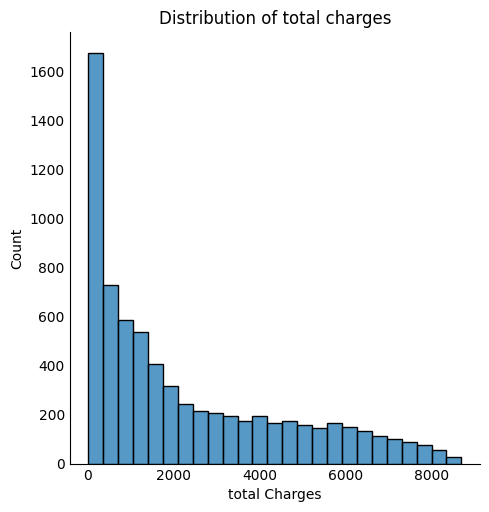

In [178]:
plt.figure(figsize=(10,6))
sns.displot(df['TotalCharges'])
plt.title('Distribution of total charges')
plt.xlabel('total Charges')
plt.ylabel('Count')
plt.show()

### Churn

In [179]:
df["Churn"].value_counts(dropna=False)

Churn
No     5163
Yes    1869
Name: count, dtype: int64

no null values in Churn column

In [180]:
(df["Churn"].value_counts(dropna=False) / len(df)) * 100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

A total of 26 % of customers are churning

### PaymentMethod

In [181]:
df["PaymentMethod"].value_counts(dropna=False)

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [182]:
(df["PaymentMethod"].value_counts(dropna=False)/ len(df)) * 100

PaymentMethod
Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: count, dtype: float64

the most popular payment method is Electronic check

### SeniorCitizen, Partner, Dependents

In [183]:
df["SeniorCitizen"].value_counts(dropna=False)

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

senior customers represent 83 %

In [184]:
df["Partner"].value_counts(dropna=False)

Partner
No     3639
Yes    3393
Name: count, dtype: int64

In [185]:
(df["Partner"].value_counts(dropna=False)/ len(df)) * 100

Partner
No     51.749147
Yes    48.250853
Name: count, dtype: float64

In [186]:
df["Dependents"].value_counts(dropna=False)

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

In [187]:
(df["Dependents"].value_counts(dropna=False)/ len(df)) * 100

Dependents
No     70.150739
Yes    29.849261
Name: count, dtype: float64

### InternetService

In [188]:
df["InternetService"].value_counts(dropna=False)

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

- the most common internet service is Fiber optic
- the are 1520 customers with no internet service

In [189]:
(df["InternetService"].value_counts(dropna=False)/ len(df)) * 100

InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: count, dtype: float64

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:

In [190]:
df["OnlineSecurity"].value_counts(dropna=False)

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [191]:
df["OnlineBackup"].value_counts(dropna=False)

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

In [192]:
df["DeviceProtection"].value_counts(dropna=False)

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

In [193]:
df["TechSupport"].value_counts(dropna=False)

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

- significant portion of customers are not adopting additional services 
- It may be due to a lack of awareness among senior citizens that a significant portion of customers do not adopt additional services.

### numAdminTickets, numTechTickets

In [194]:
df["numAdminTickets"].value_counts(dropna=False)

numAdminTickets
0    5834
3     262
5     243
2     243
4     228
1     222
Name: count, dtype: int64

In [195]:
df["numTechTickets"].value_counts(dropna=False)

numTechTickets
0    6062
1     256
2     201
3     151
4     133
5     116
6      72
7      29
8      11
9       1
Name: count, dtype: int64

### StreamingTV, StreamingMovies

In [196]:
df["StreamingTV"].value_counts(dropna=False)

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [197]:
df["StreamingTV"].value_counts(dropna=False)

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

## Multivariate analysis

### MonthlyCharges vs. Churn

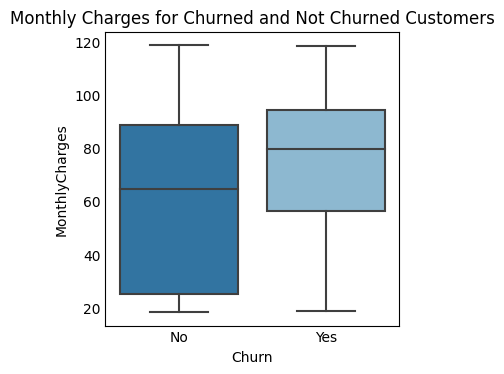

In [221]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges for Churned and Not Churned Customers')
plt.show()

In [225]:
print(df.groupby('Churn')['MonthlyCharges'].describe())

        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
No     5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


Observations:
- Churned customers have a higher mean than non-churned customers.
- Unchurned customers have lower monthly charges than churned customers.

Hypothesis
- Due to the existence of pricing tiers with close prices, the monthly charges are not very different from one another.
- High prices may be contributing to customer churn.

### TotalCharges vs. Churn

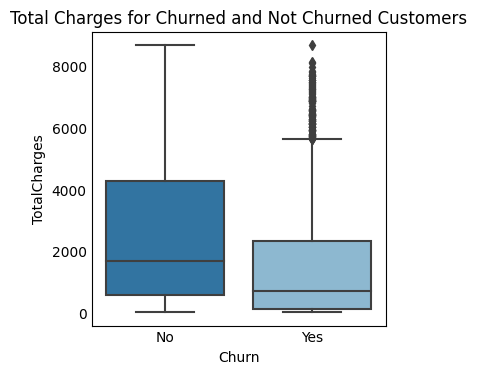

In [222]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges for Churned and Not Churned Customers')
plt.show()

In [224]:
print(df.groupby('Churn')['TotalCharges'].describe())

        count         mean          std    min      25%      50%       75%   
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125  \
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


- For churned customers, there are outliers with values above 6000
- The total costs of not churning customers are higher than those of churning customers

### TotalCharges vs. Churn

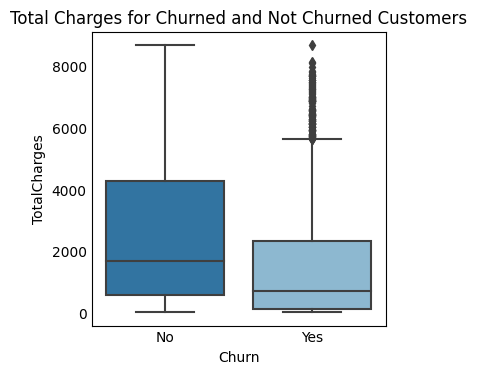

In [222]:
plt.figure(figsize=(3,3))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges for Churned and Not Churned Customers')
plt.show()

In [224]:
print(df.groupby('Churn')['TotalCharges'].describe())

        count         mean          std    min      25%      50%       75%   
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125  \
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


- For churned customers, there are outliers with values above 6000
- The total costs of not churning customers are higher than those of churning customers